In [1]:
#Importing Libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.simplefilter('ignore')


In [2]:
#Loading Dataset 
df_salaries = pd.read_csv("/Users/akb/Desktop/DS/BIA/vscode workspace/BIA_Questions_LMS_Worksheet/BIA_Mini Project/salaries.csv")

In [3]:
df_salaries.shape

(15965, 11)

In [4]:
df_salaries.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,EN,FT,Data Analyst,20000,USD,20000,KE,100,KE,M
1,2024,SE,FT,Data Analyst,147500,USD,147500,US,0,US,M
2,2024,SE,FT,Data Analyst,85000,USD,85000,US,0,US,M


In [5]:
df_salaries.info()

#Observation - this dataset mostly contain categorical columns hence we need to do encoding. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15965 entries, 0 to 15964
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           15965 non-null  int64 
 1   experience_level    15965 non-null  object
 2   employment_type     15965 non-null  object
 3   job_title           15965 non-null  object
 4   salary              15965 non-null  int64 
 5   salary_currency     15965 non-null  object
 6   salary_in_usd       15965 non-null  int64 
 7   employee_residence  15965 non-null  object
 8   remote_ratio        15965 non-null  int64 
 9   company_location    15965 non-null  object
 10  company_size        15965 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.3+ MB


In [6]:
#Checking if there are any null values 

df_salaries.isnull().sum()

#Observation - There are no null values in this case 

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

#### Observations 

1. We got 11 columns with 15965 rows: 

2. 3 numeric columns: (1)work_year, (2)salary_in_usd, (3)remote_ratio (4)salary

3. 6 categorical columns: (1)experience_level, (2)employment_type, (3)job_title, (4)employee_residense, (5)company_location, (6)company_size, (7)salary_currency

In [7]:
df_salaries.columns

#There are 11 columns 

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [8]:
#Dropping Columns which are not relevant for the study or is a duplicate 

#1.Dropping salary because salary_in_usd is more  useful for this analysis 

df_salaries.drop(columns="salary",axis=1,inplace=True)

In [9]:
df_salaries.describe()

,work_year,salary_in_usd,remote_ratio
count,15965.000000,15965.000000,15965.000000
mean,2023.199311,149791.373505,32.305042
std,0.710809,68637.654340,46.346860
min,2020.000000,15000.000000,0.000000
25%,2023.000000,101570.000000,0.000000
50%,2023.000000,141298.000000,0.000000
75%,2024.000000,185900.000000,100.000000
max,2024.000000,800000.000000,100.000000


In [10]:
#Checking for dupplicates in the dataset

df_salaries.duplicated().sum()

6167

#### Observation 

- There are around 6167 duplicates in this dataset out of 15964 cases

In [11]:
df_salaries[df_salaries.duplicated()]

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
63,2024,SE,FT,Data Scientist,USD,167500,US,0,US,M
64,2024,SE,FT,Data Scientist,USD,138500,US,0,US,M
98,2024,EN,FT,Data Analyst,GBP,33500,GB,0,GB,M
106,2024,EN,FT,Data Scientist,GBP,33500,GB,0,GB,M
112,2024,SE,FT,Data Architect,USD,117000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...
15666,2022,MI,FT,Data Scientist,USD,78000,US,100,US,M
15667,2022,SE,FT,Data Engineer,USD,135000,US,100,US,M
15668,2022,SE,FT,Data Engineer,USD,115000,US,100,US,M
15807,2021,MI,FT,Data Engineer,USD,200000,US,100,US,L


In [12]:
#Handling duplicates by dropping them 

df_salaries_clean = df_salaries.drop_duplicates()

In [13]:
df_salaries_clean["job_title"].value_counts().reset_index(name="Count")

,job_title,Count
0,Data Engineer,1797
1,Data Scientist,1791
2,Data Analyst,1340
3,Machine Learning Engineer,924
4,Analytics Engineer,352
...,...,...
150,Quantitative Research Analyst,1
151,AWS Data Architect,1
152,Analytics Engineering Manager,1
153,Marketing Data Scientist,1


In [14]:
# Replace 'ML Engineer' with 'Machine Learning Engineer' in the 'job_title' column
df_salaries_clean["job_title"].replace('ML Engineer', 'Machine Learning Engineer', inplace=True)

### Visualisation 

([<matplotlib.patches.Wedge at 0x32b5ea910>,
 [Text(0.6948375216735496, 0.8527607041102209, 'Data Engineer'),
  Text(-0.9740210740402183, 0.5111584366177867, 'Data Scientist'),
  Text(-0.535515951143959, -0.960844766895455, 'Data Analyst'),
  Text(0.6986194364176338, -0.8496651593772149, 'Machine Learning Engineer'),
  Text(1.083434901512853, -0.1901810037407386, 'Analytics Engineer')],
 [Text(0.3790022845492088, 0.4651422022419386, '28.24%'),
  Text(-0.5312842222037554, 0.2788136927006109, '28.14%'),
  Text(-0.2920996097148867, -0.524097145579339, '21.06%'),
  Text(0.3810651471368911, -0.4634537232966626, '17.03%'),
  Text(0.5909644917342833, -0.10373509294949376, '5.53%')])

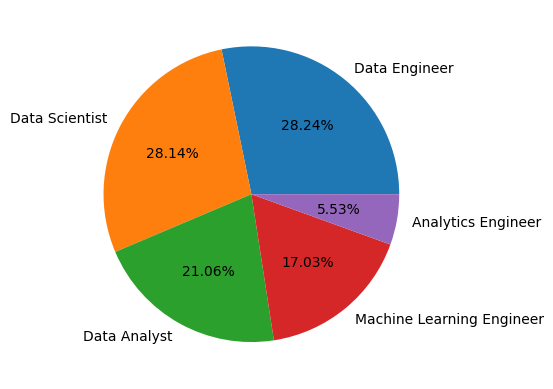

In [15]:
#Displaying the top 10 job titles from the dataset 
count_jobtitle = df_salaries_clean["job_title"].value_counts().values
name_jobtitle = df_salaries_clean["job_title"].value_counts().index

plt.pie(count_jobtitle[:5], labels=name_jobtitle[:5], autopct="%1.2f%%")


#### Observation 

1. Data Scientists are the most common profession ([2]), followed by Data Engineers and Research Scientists/Engineers

([<matplotlib.patches.Wedge at 0x32b60de50>,
 [Text(-0.3089828452481027, 1.0557128403796117, 'SE'),
  Text(-0.1637469774903613, -1.0877439622276794, 'MI'),
  Text(0.9358064628807286, -0.5781576463480007, 'EN'),
  Text(1.0921844960590048, -0.13089318763151167, 'EX')],
 [Text(-0.168536097408056, 0.575843367479788, '59.06%'),
  Text(-0.0893165331765607, -0.5933148884878251, '27.12%'),
  Text(0.5104398888440337, -0.31535871618981853, '10.02%'),
  Text(0.5957369978503662, -0.07139628416264272, '3.80%')])

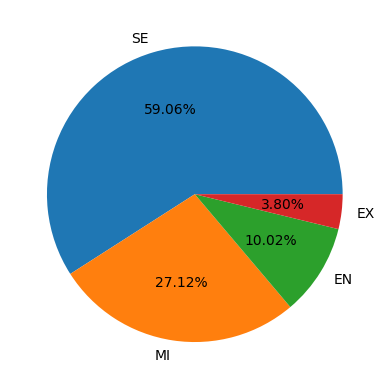

In [16]:
#Displaying the experience_level from the dataset 
count_experience_level = df_salaries_clean["experience_level"].value_counts().values
name_experience_level = df_salaries_clean["experience_level"].value_counts().index   

plt.pie(count_experience_level, labels=name_experience_level, autopct="%1.2f%%")

([<matplotlib.patches.Wedge at 0x32b6dca10>,
 [Text(-1.0996986883717563, 0.025744801289559114, 'FT'),
  Text(1.0992780616877318, -0.03984649410002559, 'PT'),
  Text(1.0998351189158628, -0.01904497832317491, 'CT'),
  Text(1.0999889167180152, -0.004937924414915788, 'FL')])

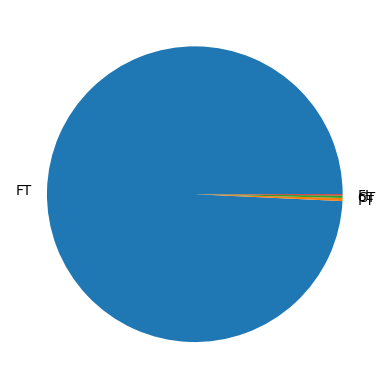

In [17]:
#Displaying the employment_type from the dataset 
count_employment_type = df_salaries_clean["employment_type"].value_counts().values
name_employment_type = df_salaries_clean["employment_type"].value_counts().index   

plt.pie(count_employment_type, labels=name_employment_type)

#### Observations 

Seniority Distribution: The majority of the data scientists in this dataset appear to be in SE (Sneior Level) followed by Mid Level. Which shows that there is a high demand for these professional in the industry. 

([<matplotlib.patches.Wedge at 0x32b735690>,
 [Text(-1.0586557061548825, 0.2987441979783164, 'USD'),
  Text(1.0140040704787983, -0.42637512245958775, 'GBP'),
  Text(1.091689360203189, -0.13496051577832668, 'EUR')],
 [Text(-0.5774485669935722, 0.16295138071544532, '91.25%'),
  Text(0.5530931293520718, -0.23256824861432057, '4.84%'),
  Text(0.5954669237471939, -0.07361482678817818, '3.92%')])

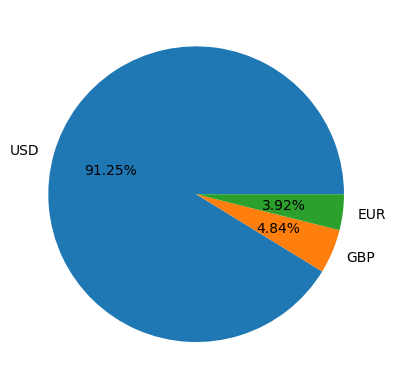

In [18]:
#Displaying the top three salary_currency from the dataset 
count_salary_currency = df_salaries_clean["salary_currency"].value_counts().values
name_salary_currency = df_salaries_clean["salary_currency"].value_counts().index

plt.pie(count_salary_currency[:3], labels=name_salary_currency[:3], autopct="%1.2f%%")

In [19]:
df_salaries_clean["employee_residence"].unique()

array(['KE', 'US', 'AU', 'GB', 'LV', 'CA', 'GE', 'IN', 'ZA', 'ES', 'LT',
       'DE', 'IL', 'FI', 'NL', 'AT', 'HR', 'BR', 'CH', 'AE', 'GR', 'FR',
       'PL', 'SA', 'UA', 'EG', 'PH', 'TR', 'OM', 'NZ', 'MX', 'PT', 'BA',
       'AR', 'IT', 'IE', 'EE', 'MT', 'LB', 'RO', 'HU', 'VN', 'NG', 'CZ',
       'PK', 'UG', 'CO', 'SI', 'MU', 'AM', 'TH', 'KR', 'QA', 'RU', 'TN',
       'GH', 'BE', 'AD', 'EC', 'PE', 'MD', 'NO', 'UZ', 'JP', 'HK', 'CF',
       'SG', 'SE', 'KW', 'CY', 'IR', 'AS', 'CN', 'CR', 'CL', 'PR', 'DK',
       'BO', 'DO', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'LU'],
      dtype=object)

([<matplotlib.patches.Wedge at 0x32b786fd0>,
 [Text(-1.07109556661246, 0.25050805812016, 'US'),
  Text(1.0442664555454482, -0.345698669107283, 'GB'),
  Text(1.0955540636453198, -0.09879925925950422, 'CA')],
 [Text(-0.5842339454249781, 0.13664075897463274, '92.69%'),
  Text(0.5695998848429716, -0.1885629104221543, '4.45%'),
  Text(0.597574943806538, -0.05389050505063866, '2.86%')])

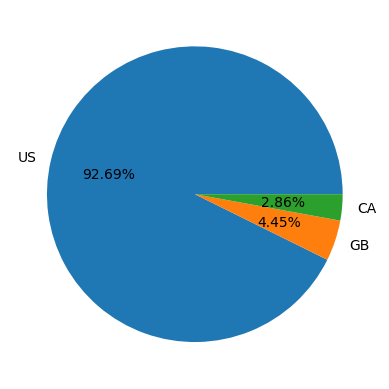

In [20]:
#Displaying the top 3 employee_residence from the dataset 
count_employee_residence = df_salaries["employee_residence"].value_counts().values
name_employee_residence = df_salaries["employee_residence"].value_counts().index

plt.pie(count_employee_residence[:3], labels=name_employee_residence[:3], autopct="%1.2f%%")


In [21]:
df_salaries_clean["company_location"].unique()


array(['KE', 'US', 'AU', 'GB', 'LV', 'CA', 'IN', 'ZA', 'ES', 'LT', 'DE',
       'IL', 'FI', 'NL', 'AT', 'BR', 'CH', 'AE', 'FR', 'PL', 'SA', 'UA',
       'EG', 'PH', 'TR', 'OM', 'NZ', 'MX', 'PT', 'BA', 'AR', 'IT', 'AS',
       'IE', 'EE', 'MT', 'HU', 'LB', 'RO', 'VN', 'NG', 'LU', 'GI', 'CO',
       'SI', 'GR', 'MU', 'RU', 'KR', 'CZ', 'QA', 'DK', 'GH', 'SE', 'AD',
       'EC', 'NO', 'JP', 'HK', 'CF', 'SG', 'TH', 'HR', 'AM', 'PK', 'IR',
       'BS', 'PR', 'BE', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'CN', 'CL', 'MD'],
      dtype=object)

([<matplotlib.patches.Wedge at 0x32b7d7950>,
 [Text(-1.0333450685250654, 0.377091460198886, 'US'),
  Text(0.9557972504685377, -0.5444737055145855, 'GB'),
  Text(1.077261174478728, -0.2225047459285128, 'CA'),
  Text(1.099295873082506, -0.03935204472160182, 'DE')])

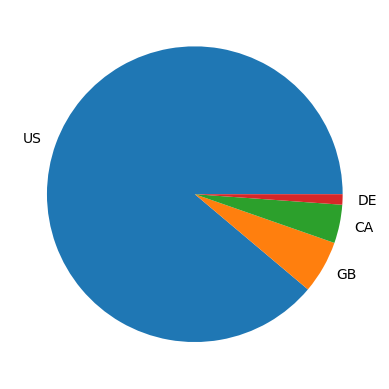

In [22]:
#Displaying the top company_location from the dataset 

name_company_location = df_salaries_clean["company_location"].value_counts().index
count_company_location = df_salaries_clean["company_location"].value_counts().values

plt.pie(count_company_location[:4], labels=name_company_location[:4])

In [23]:
#Comapny location, wrt residence location 


([<matplotlib.patches.Wedge at 0x32b827bd0>,
 [Text(0.09405587126135635, 1.0959714836989451, '2023'),
  Text(-0.5624754583614232, -0.945315481064976, '2024'),
  Text(0.9409591567454162, -0.5697331527451738, '2022'),
  Text(1.0924342647298586, -0.12879199215841625, '2021'),
  Text(1.0996819550930197, -0.02644990818120066, '2020')],
 [Text(0.05130320250619437, 0.5978026274721518, '47.27%'),
  Text(-0.30680479546986716, -0.5156266260354414, '38.36%'),
  Text(0.5132504491338633, -0.3107635378610038, '11.39%'),
  Text(0.5958732353071955, -0.0702501775409543, '2.20%'),
  Text(0.5998265209598288, -0.014427222644291268, '0.77%')])

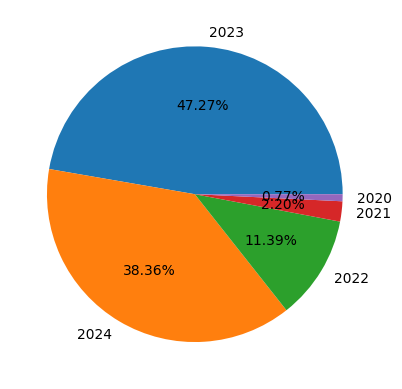

In [24]:
name_work_year = df_salaries_clean["work_year"].value_counts().index
count_work_year = df_salaries_clean["work_year"].value_counts().values

plt.pie(count_work_year, labels=name_work_year,autopct="%1.2f%%")


<Axes: xlabel='count', ylabel='company_size'>

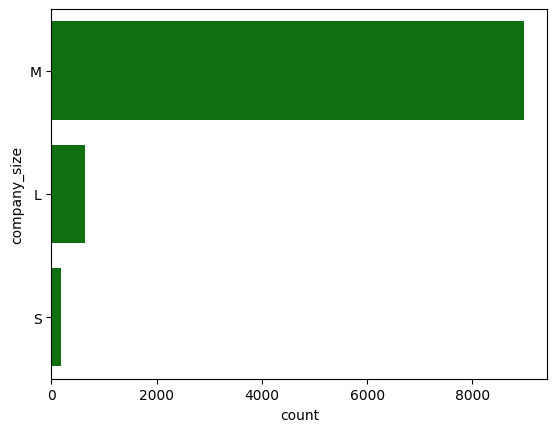

In [25]:
#Displaying the count of data/entries based on company_size from the dataset 
sns.countplot(df_salaries_clean["company_size"], color="green")

([<matplotlib.patches.Wedge at 0x32b8fca90>,
 [Text(-0.43208667193334493, 1.0115834656307734, '0'),
  Text(0.35070156813720715, -1.0425969547750003, '100'),
  Text(1.0965521058420724, -0.08702573856806085, '50')],
 [Text(-0.23568363923636992, 0.5517727994349673, '62.85%'),
  Text(0.1912917644384766, -0.568689248059091, '34.63%'),
  Text(0.5981193304593122, -0.04746858467348774, '2.52%')])

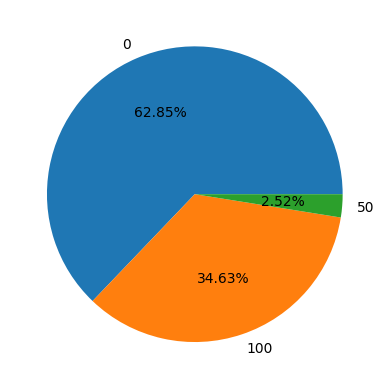

In [26]:
#Displaying the count of on remote_ratio from the dataset 

# sns.barplot(df_salaries_clean["remote_ratio"])

name_remote_ratio = df_salaries_clean["remote_ratio"].value_counts().index
count_remote_ratio = df_salaries_clean["remote_ratio"].value_counts().values

plt.pie(count_remote_ratio, labels=name_remote_ratio,autopct="%1.2f%%")

In [27]:
# Remote Ratio by Work Year

In [28]:
# Highest salaries by job title

In [29]:
# Salary by Company Size

In [30]:
# Salary by Experience Level

In [31]:
# Salary by work year

In [32]:
# Company Size by Experience Level

In [33]:
# Top 3 Job Title by Experience Level

#### Observation 

1. Based on the company_size bar graph we can be say that this dataset mostly contains data from Medium level enterprise. 
2. OR we could say that  it's mostly Medium Size company that hire employees related to Data Science. 

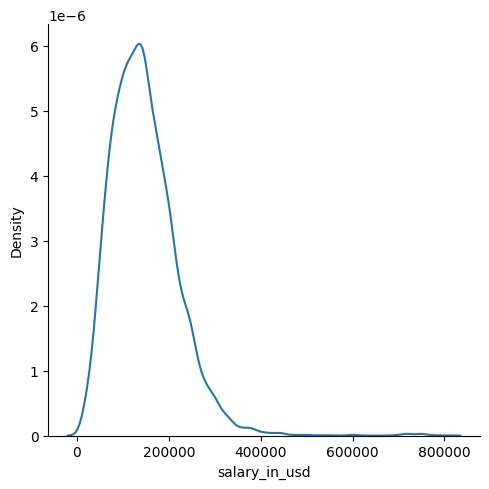

In [34]:
#Checking distribution of Salary 

sns.displot(df_salaries_clean["salary_in_usd"], kind="kde")

<Axes: ylabel='salary_in_usd'>

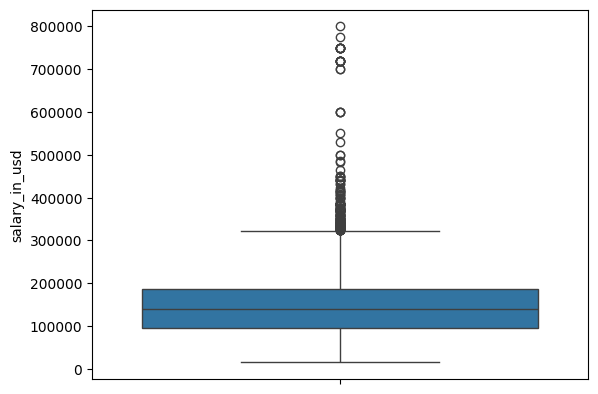

In [35]:
#Checking if there are outliers in Salary 

sns.boxplot(df_salaries_clean["salary_in_usd"])

In [36]:
# Removing Outliers using IQR

#Calculating the IQR 
q1_salary = df_salaries_clean.salary_in_usd.quantile(0.25)
q3_salary = df_salaries_clean.salary_in_usd.quantile(0.75)

IQR_salary = q3_salary - q1_salary

print("The Q1 and Q3 are: ", q1_salary, q3_salary)
print(f"The IQR for Fare is {IQR_salary}")

# Define your desired threshold (as a multiplier of IQR)
threshold = 1.25 

# Calculate lower and upper limits based on the threshold
lower_limit_salary = q1_salary - threshold * IQR_salary
upper_limit_salary = q3_salary + threshold * IQR_salary


# # Identifying data points below Q1 - 1.5 * IQR and Q3 + 1.5 * IQR
# lower_limit_salary = q1_salary - 1.5 * IQR_salary
# upper_limit_salary = q3_salary + 1.5 * IQR_salary

print("The Lower and Upper Limit\n", lower_limit_salary ,"\n", upper_limit_salary)



The Q1 and Q3 are:  95000.0 185900.0
The IQR for Fare is 90900.0
The Lower and Upper Limit
 -18625.0 
 299525.0


In [37]:
#Detecting the outliers 

outlier_salary = df_salaries_clean[(df_salaries_clean.salary_in_usd < lower_limit_salary) | (df_salaries_clean.salary_in_usd  > upper_limit_salary)]
outlier_salary

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
41,2024,SE,FT,Machine Learning Engineer,USD,306000,US,0,US,M
43,2024,EX,FT,Data Science,USD,300000,US,100,US,M
59,2024,SE,FT,Analytics Engineer,USD,500000,US,0,US,M
183,2024,SE,FT,Machine Learning Engineer,USD,336000,CA,100,CA,M
184,2024,SE,FT,Machine Learning Engineer,USD,304000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...
15747,2020,MI,FT,Research Scientist,USD,450000,US,0,US,M
15892,2021,EX,CT,Principal Data Scientist,USD,416000,US,100,US,S
15911,2020,EX,FT,Director of Data Science,USD,325000,US,100,US,L
15957,2021,MI,FT,Applied Machine Learning Scientist,USD,423000,US,50,US,L


In [38]:
df_salaries_clean.drop(columns="salary_currency",axis=1,inplace=True)
#Filter data (exclude outliers)
df_filtered = df_salaries_clean[
    (df_salaries_clean['salary_in_usd'] >= lower_limit_salary) &
    (df_salaries_clean['salary_in_usd'] <= upper_limit_salary)
]

# Print results (optional)
print("Original DataFrame (with outliers):")
print(df_salaries_clean.shape)  # Print the shape to see the original number of rows
print("\nDataFrame after removing outliers:")
print(df_filtered.shape)  # Print the shape to see the number of rows after filtering

# Use df_filtered for further analysis

Original DataFrame (with outliers):
(9798, 9)

DataFrame after removing outliers:
(9519, 9)


#### Observation: 

1. There are around 281 outliers in salary out of the 15965 records. (1.76% of data)
2. Since it' only 1.76% I will drop those rows for now. 

## Feature Engineering




In [39]:

#Categorical Encoding using map

df_filtered["company_size"] = df_filtered["company_size"].map({"S": 1, "M": 2, "L":3})
df_filtered["experience_level"] = df_filtered["experience_level"].map({"EN": 1, "MI": 2, "SE":3, "EX":4})
df_filtered["employment_type"] = df_filtered["employment_type"].map({"FL": 1, "CT": 2, "PT":3, "FT":4})

# One-Hot Encoding - employee_residence
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
# df_filtered["employee_residence"] = ohe.fit_transform(df_filtered[["employee_residence"]])
# df_filtered["job_title"] = ohe.fit_transform(df_filtered[["job_title"]])
# df_filtered["company_location"] = ohe.fit_transform(df_filtered[["company_location"]])




# #Label Encoder - employee_residence 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_filtered["employee_residence"] = label_encoder.fit_transform(df_filtered["employee_residence"])
df_filtered["company_location"] = label_encoder.fit_transform(df_filtered["company_location"])
df_filtered["job_title"] = label_encoder.fit_transform(df_filtered["job_title"])


In [40]:
# df_filtered.drop(columns="job_title",axis=1,inplace=True)

In [41]:
# # # Split the dataset into training and testing sets
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
df_filtered.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,1,4,45,20000,48,100,43,2
1,2024,3,4,45,147500,83,0,73,2
2,2024,3,4,45,85000,83,0,73,2
3,2024,3,4,53,175000,83,0,73,2
4,2024,3,4,53,117000,83,0,73,2


<Axes: >

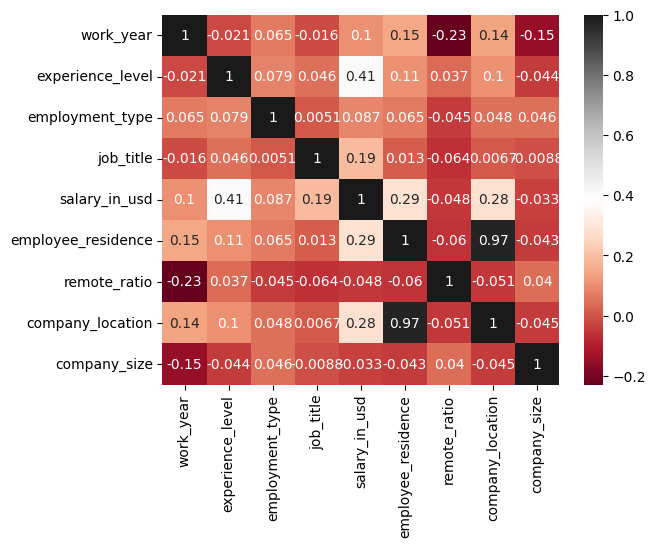

In [43]:
correlation = df_filtered.corr()

sns.heatmap(correlation, annot=True, cmap="RdGy")

In [44]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer

# df_filtered['job_title'] = df_filtered['job_title'].str.lower()

# # Example with maximum features set to 100 (adjust as needed)
# vectorizer = TfidfVectorizer(max_features=100)

# tfidf_matrix = vectorizer.fit_transform(df_filtered['job_title'])


## Model Training 

In [45]:
#Importing Lib

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [46]:
#Defining the features and target 

y = df_filtered["salary_in_usd"]
X = df_filtered[["experience_level","company_size","employment_type","remote_ratio","job_title","employee_residence"]]

# Combine features
# X = pd.concat([df_filtered[["experience_level", "company_size", "employment_type","remote_ratio","work_year"]], pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())], axis=1)



In [47]:
# # Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Scaling the Features - X-train, X-test using Standard Scaler 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [50]:
#Make Prediction using the test data 

y_pred = model.predict(X_test)

## Evaluating the Performance of the Model (R^2, MSE, MAE, Ajusted R-squared RMSE) 

In [51]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

rmse = np.sqrt(mse) 
print(f"RMSE: {rmse}")

neg_mse = -mse
print("Negative Mean Squared Error:", neg_mse)


Mean Squared Error: 2813280687.593782
R-squared: 0.25307624535102935
RMSE: 53040.36847151217
Negative Mean Squared Error: -2813280687.593782


In [52]:
#Getting the Coefficient(Slope) and Intercept 

coeff = model.coef_
intercept = model.intercept_

print(f"Coefficient - {coeff}")
print(f"Intercept - {intercept}")

Coefficient - [22277.45939177  -297.48595147  2243.82203775 -1997.98687361
 10264.38174577 14126.97736321]
Intercept - 139811.22298095864


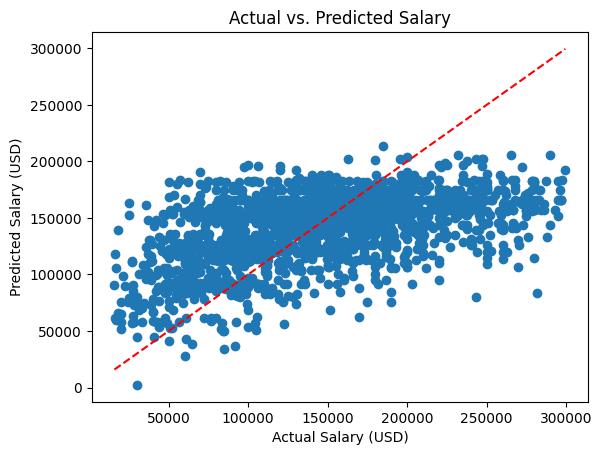

In [53]:
import matplotlib.pyplot as plt


# Scatter plot y_test vs y_pred
plt.scatter(y_test, y_pred)

# Add labels and title
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('Actual vs. Predicted Salary')

# Add a diagonal line for perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Show the plot
plt.show()


In [54]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit() #Dependent variable always first
prediction = model.predict(X_test) 
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:          salary_in_usd   R-squared (uncentered):                   0.040
Model:                            OLS   Adj. R-squared (uncentered):              0.039
Method:                 Least Squares   F-statistic:                              52.42
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    1.39e-63
Time:                        00:36:16   Log-Likelihood:                     -1.0151e+05
No. Observations:                7615   AIC:                                  2.030e+05
Df Residuals:                    7609   BIC:                                  2.031e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Model Training with L1 and L2 / Cross-Validation / Hyperparameter Tuning

In [55]:
#Defining the features and target 

# y = df_filtered["salary_in_usd"]
# X = df_filtered[["experience_level","company_size","employment_type"]]

y = df_filtered["salary_in_usd"]
X = df_filtered[["experience_level","company_size","employment_type","remote_ratio","job_title","employee_residence"]]

# Combine features
# X = pd.concat([df_filtered[["experience_level", "company_size", "employment_type","remote_ratio","work_year"]], pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())], axis=1)

In [56]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Scaling the Features - X-train, X-test using Standard Scaler 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# Create and train a linear regression model
model = LinearRegression()

In [59]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [60]:
#Make Prediction using the test data 

y_pred = model.predict(X_test)

In [61]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=10, random_state=1, shuffle=True)


nmse = cross_val_score(model, X_train, y_train,cv=cv, scoring="neg_mean_squared_error") #Checking with R2 Score.
print(nmse)
mean_msen = np.mean(nmse)
print("Negative Mean Squared Error - ", mean_msen)

r2 = r2_score(y_test,y_pred)
print(f'R-squared: {r2}')


[-2.74620270e+09 -2.71567802e+09 -2.49470071e+09 -2.51080302e+09
 -2.82189054e+09 -2.57780536e+09 -2.70190009e+09 -2.68025836e+09
 -2.68894072e+09 -2.58932108e+09]
Negative Mean Squared Error -  -2652750059.0700665
R-squared: 0.25307624535102935


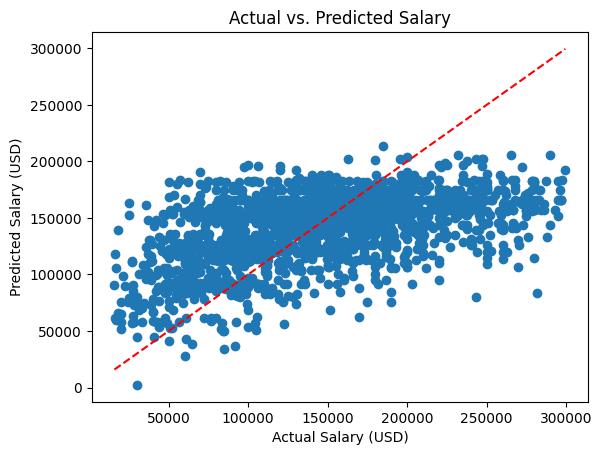

In [62]:
import matplotlib.pyplot as plt

# Assuming you have already performed the model training and prediction steps

# Scatter plot y_test vs y_pred
plt.scatter(y_test, y_pred)

# Add labels and title
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('Actual vs. Predicted Salary')

# Add a diagonal line for perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Show the plot
plt.show()


## Lasso Regression

In [63]:
#Defining the features and target 

# y = df_filtered["salary_in_usd"]
# X = df_filtered[["experience_level","company_size","employment_type"]]

y = df_filtered["salary_in_usd"]
X = df_filtered[["experience_level","company_size","employment_type","remote_ratio","job_title","employee_residence"]]

# Combine features
# X = pd.concat([df_filtered[["experience_level", "company_size", "employment_type","remote_ratio","work_year"]], pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())], axis=1)

In [64]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Scaling the Features - X-train, X-test using Standard Scaler 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
#Lasso Regression 

#Importing Libraries
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

alphas = np.logspace(-3, 3, 7)
params = {'alpha': alphas}

# params = {"alpha":[1e-35,1e-25,1e-20,1e-15,1e-10,1e-8,1e-3,1,5,10,20,30,40,50]}


# lasso_regressor = GridSearchCV(lasso,params,scoring="neg_mean_squared_error",cv=5)
lasso_regressor = GridSearchCV(lasso,params,scoring="r2",cv=5)

lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='r2')

In [67]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 100.0}
0.2549480534210681


In [68]:
from sklearn.metrics import r2_score

r2_score = r2_score(y_test,y_pred)
print(r2_score)

mean_msen = np.mean(nmse)
print("Negative Mean Squared Error - ", mean_msen)


0.25307624535102935
Negative Mean Squared Error -  -2652750059.0700665


## Decision Tree Model

In [69]:
import sklearn.model_selection 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [70]:
#Defining the features and target 

# y = df_filtered["salary_in_usd"]
# X = df_filtered[["experience_level","employment_type","company_size"]]

y = df_filtered["salary_in_usd"]
X = df_filtered[["experience_level","company_size","employment_type","remote_ratio","job_title","employee_residence"]]

In [71]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Scaling the Features - X-train, X-test using Standard Scaler 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
#Creating Decision Tree Classifier 

clf = DecisionTreeRegressor(random_state=42) #Random State is not mandatory here but it is used for shuffling here


In [74]:
#Training the model 

clf.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [75]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

In [76]:
# Evaluate the model's performance

from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


r2 = r2_score(y_test,y_pred)
print(f'R-squared: {r2}')


rmse = np.sqrt(mse) 
print(f"RMSE: {rmse}")



Mean Squared Error: 2610479790.727695
R-squared: 0.3069197199824054
RMSE: 51092.85459560559


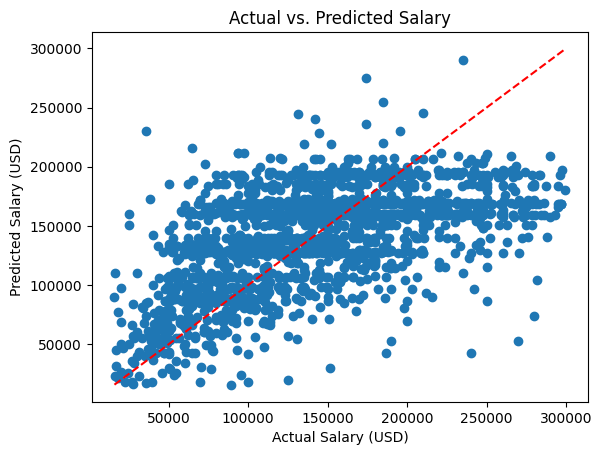

In [77]:
import matplotlib.pyplot as plt

# Assuming you have already performed the model training and prediction steps

# Scatter plot y_test vs y_pred
plt.scatter(y_test, y_pred)

# Add labels and title
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('Actual vs. Predicted Salary')

# Add a diagonal line for perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Show the plot
plt.show()


## Cross Validation Method 

In [78]:
#Defining the features and target 

# y = df_filtered["salary_in_usd"]
# X = df_filtered[["experience_level","employment_type","company_size"]]

y = df_filtered["salary_in_usd"]
X = df_filtered[["experience_level","company_size","employment_type","remote_ratio","job_title","employee_residence"]]

In [79]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Scaling the Features - X-train, X-test using Standard Scaler 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
#Creating Decision Tree Classifier 

clf = DecisionTreeRegressor(random_state=42) #Random State is not mandatory here but it is used for shuffling here

#Training the model 

clf.fit(X_train,y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

In [82]:
#Performing Cross Validation (Eg: k = 5)

k = 5
cross_score = cross_val_score(clf,X,y,cv=k)

In [83]:
print(f"Cross Validation Score -  {cross_score}") #For 5 split we get 5 different values 
print(f"Mean Accuracy -  {cross_score.mean():.2f}")
print(f"Standard Deviation -  {cross_score.std():.2f}") #Standard Devation should be less 

Cross Validation Score -  [0.28192171 0.21851916 0.290032   0.23772519 0.25976926]
Mean Accuracy -  0.26
Standard Deviation -  0.03


In [84]:
#Giving the parameter to tune 
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     "criterion" : ["gine", "entropy"],
#     "max_depth" : [None, 10,20,30,40,50], 
#     "min_samples_split": [2,5,10],
#     "min_samples_leaf" : [1,2,4]
# }

param_grid = {
    "criterion" : ["friedman_mse"],  
    "max_depth" : [None, 10,20,30,40,50], 
    "min_samples_split": [2,5,10],
    "min_samples_leaf" : [1,2,4],
    "min_weight_fraction_leaf": [0.0, 0.1]  # Optional for imbalanced data
}

In [85]:
#Performing Grid Search with cross-validaton (eg, K =5)

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['friedman_mse'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'min_weight_fraction_leaf': [0.0, 0.1]},
             scoring='accuracy')

In [86]:
#To get the best hyperparaneters 
best_params = grid_search.best_params_
best_params

{'criterion': 'friedman_mse',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0}

In [87]:
#Training the model with best hyperparameters 

best_clf = DecisionTreeRegressor(random_state=42, **best_params)
best_clf.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', random_state=42)

In [88]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

In [89]:
# Evaluate the model's performance

from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


r2 = r2_score(y_test,y_pred)
print(f'R-squared: {r2}')


rmse = np.sqrt(mse) 
print(f"RMSE: {rmse}")



Mean Squared Error: 2610479790.727695
R-squared: 0.3069197199824054
RMSE: 51092.85459560559


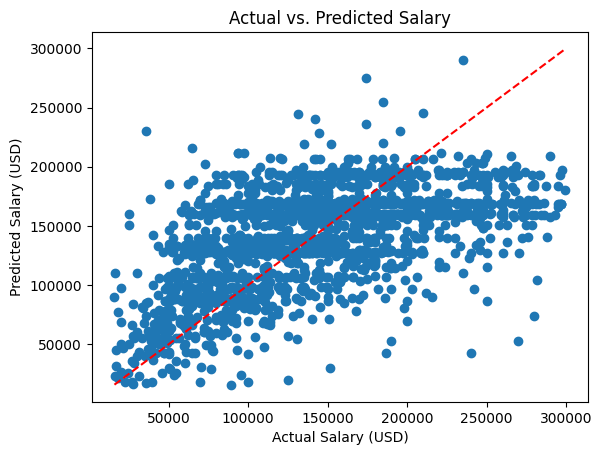

In [90]:
import matplotlib.pyplot as plt

# Assuming you have already performed the model training and prediction steps

# Scatter plot y_test vs y_pred
plt.scatter(y_test, y_pred)

# Add labels and title
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('Actual vs. Predicted Salary')

# Add a diagonal line for perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Show the plot
plt.show()


## Random Forest

In [91]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier #bagging and boosting algorithms 

In [92]:
#Defining the features and target 

# y = df_filtered["salary_in_usd"]
# X = df_filtered[["experience_level","employment_type","company_size"]]

y = df_filtered["salary_in_usd"]
X = df_filtered[["experience_level","company_size","employment_type","remote_ratio","job_title","employee_residence"]]

In [93]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
# Scaling the Features - X-train, X-test using Standard Scaler 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
print(X_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(1904, 6)
(7615, 6)
(7615,)
(1904,)


In [96]:
# Create and train a Random Forest classifier
model = RandomForestRegressor(n_estimators=100, random_state=42) #there are other parameters here as well 

#Training the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [97]:
# Make predictions using Random Forest
rf_y_pred = model.predict(X_test)


In [98]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming you have your predicted values (y_pred) and ground truth values (y_true)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, rf_y_pred)
print("Mean Squared Error (MSE):", mse)

# R-squared (R^2)
r2 = r2_score(y_test, rf_y_pred)
print("R-squared (R^2):", r2)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, rf_y_pred)
print("Mean Absolute Error (MAE):", mae)



Mean Squared Error (MSE): 2450105528.805664
R-squared (R^2): 0.3494989572380792
Mean Absolute Error (MAE): 39148.33884298852


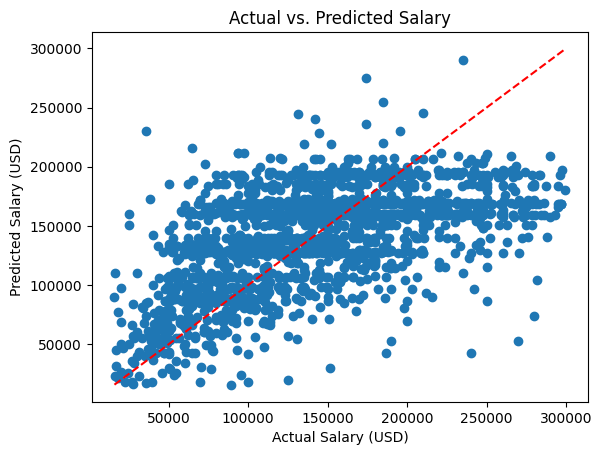

In [99]:
import matplotlib.pyplot as plt

# Scatter plot y_test vs y_pred
plt.scatter(y_test, y_pred)

# Add labels and title
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('Actual vs. Predicted Salary')

# Add a diagonal line for perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Show the plot
plt.show()


## Gradient Boosting 

In [100]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

y = df_filtered["salary_in_usd"]
X = df_filtered[["experience_level","company_size","employment_type","remote_ratio","job_title","employee_residence"]]

# Split data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the Features - X-train, X-test using Standard Scaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
# Adjust hyperparameters (n_estimators, learning_rate) as needed

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)


Mean Squared Error (MSE): 2382229542.0747705
R-squared (R^2): 0.3675199769973644


In [101]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler  # For feature scaling

# Select features and target variable
y = df_filtered["salary_in_usd"]
X = df_filtered[["experience_level", "company_size", "employment_type",
                   "remote_ratio", "job_title", "employee_residence"]]

# Feature scaling (consider if features have different scales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create the Gradient Boosting Regressor model with improved hyperparameters
model = GradientBoostingRegressor(n_estimators=300,  # Increased number of trees for potentially better accuracy
                                 learning_rate=0.05,  # Reduced learning rate to prevent overfitting
                                 max_depth=5,        # Limit tree depth to control complexity
                                 min_samples_split=20,  # Minimum samples required for splitting a node
                                 min_samples_leaf=5,   # Minimum samples required for a leaf node
                                 subsample=0.8,        # Randomly sample 80% of training data for each tree
                                 random_state=42)     # Set random seed for reproducibility

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)


Mean Squared Error (MSE): 2339850754.1546235
R-squared (R^2): 0.3787715110267904


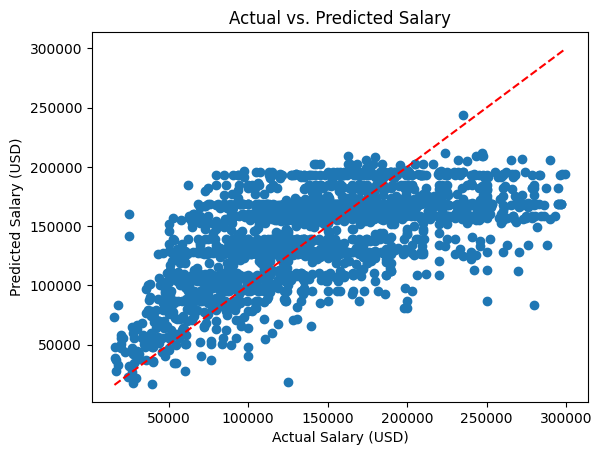

In [102]:
import matplotlib.pyplot as plt

# Assuming you have already performed the model training and prediction steps

# Scatter plot y_test vs y_pred
plt.scatter(y_test, y_pred)

# Add labels and title
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('Actual vs. Predicted Salary')

# Add a diagonal line for perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Show the plot
plt.show()


- Problem Context:

 Depending on the intended use of the model, an RMSE of 50k might be acceptable or unacceptable. For instance, if the model is used for salary estimation or screening at a high level, a 50k deviation might be tolerable. However, if it's used for precise salary prediction for individual negotiations, it might be too inaccurate.

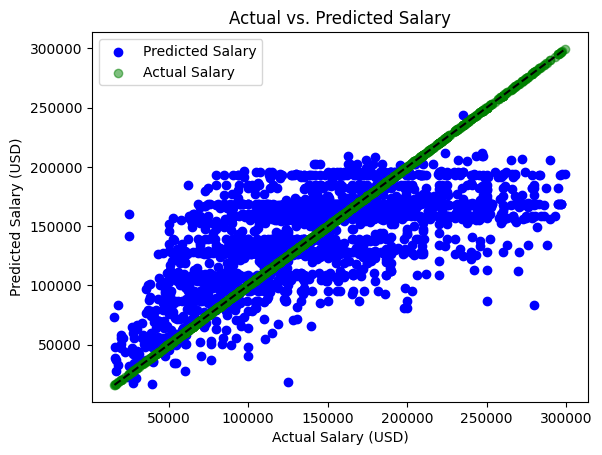

In [103]:
import matplotlib.pyplot as plt

# Assuming you have already performed the model training and prediction steps

# Scatter plot with different colors for test and predict
plt.scatter(y_test, y_pred, c='blue', label='Predicted Salary')  # Blue for predictions
plt.scatter(y_test, y_test, c='green', label='Actual Salary', alpha=0.5)  # Red for actuals with transparency

# Add labels and title
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('Actual vs. Predicted Salary')

# Add a diagonal line for perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')

# Add legend
plt.legend()

# Show the plot
plt.show()
